In [ ]:
# Copyright 2023 Regeneron Pharmaceuticals Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import os
import glob
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
from tcrvalid.plot_utils import set_simple_rc_params

import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
set_simple_rc_params()

### Assign consistent color palette for downstream plotting for consistency

In [2]:
colorblind = sns.color_palette("muted", 10)
method_colors = {
    'tcrdist' : colorblind[0],
    'ismart': colorblind[1],
    'tcrvalid':colorblind[2],
    'GLIPH':colorblind[4],
    'clustcr':colorblind[6],
    'deeptcr':colorblind[5],
    'tcr-bert': colorblind[7],
    'ESM':  colorblind[8],
     'physico' : 'w',
    '1HOT':colorblind[0],
    'PC':colorblind[1]
    

}

### Load in the spike in clustering master csv
- For example of how these scoring csvs were generated see the cluster scoring wrapper 
- Each clustering tool is run on a fixed set of irrelevant TCRs spiked in and where possible the radius parameter 'eps' is scanned.
- The scoring csvs for all approaches, for each reference TCR (tcrvalid internal reference, GLIPH2 reference and GLIPH high quality reference (GLIPH2 reference with quality score 0 (VDJDB) TCRs removed )) sets and for cluster minsize 2 & 3 are collated into a master score csv in Master_scoring_generator.ipynb


In [3]:
master_score = pd.read_csv('../comparitor_tooling/master_score.csv')

### Plotting all the spike in values for tcrdist, ismart, tcrvalid and GLIPH (X for double assigned and o for fixed) and for clustcr in order to compare the effect of spike ins per approach

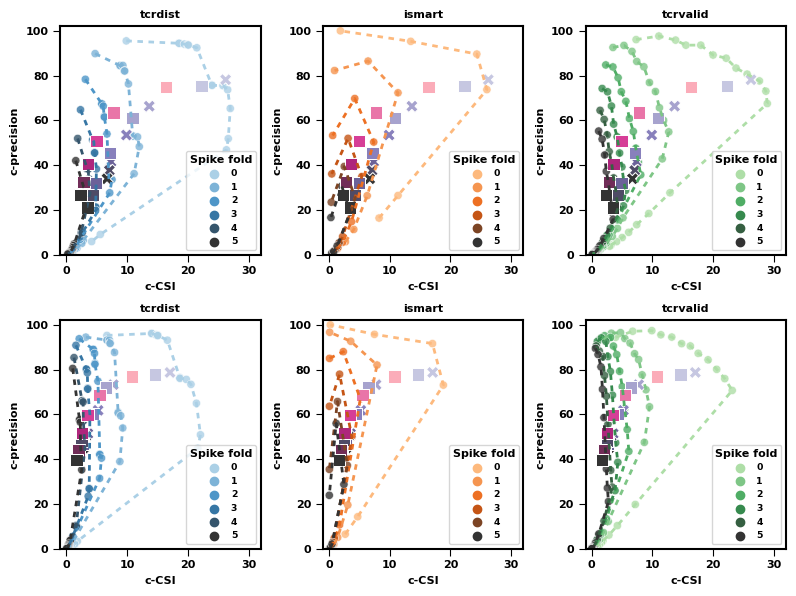

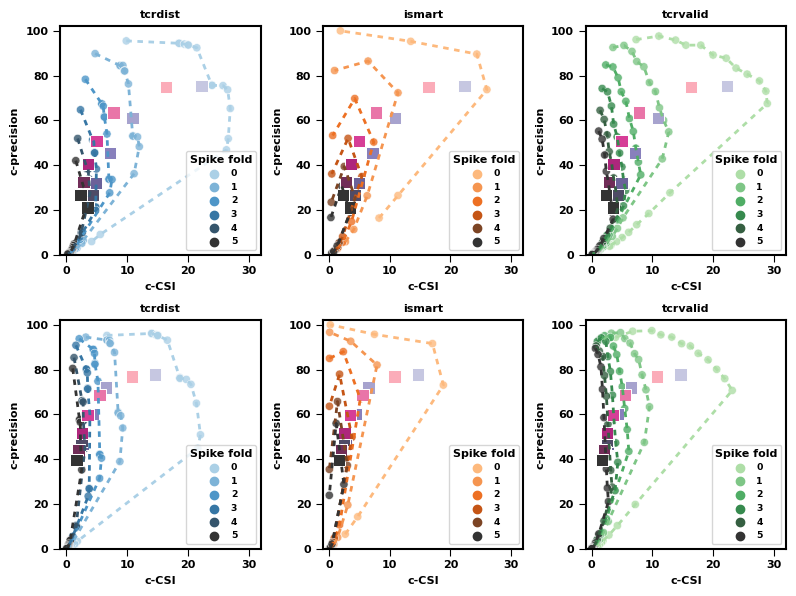

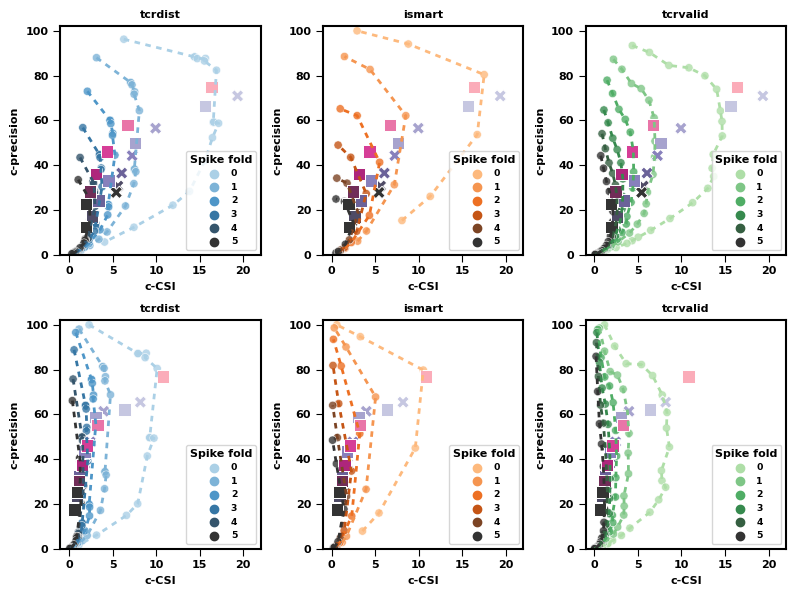

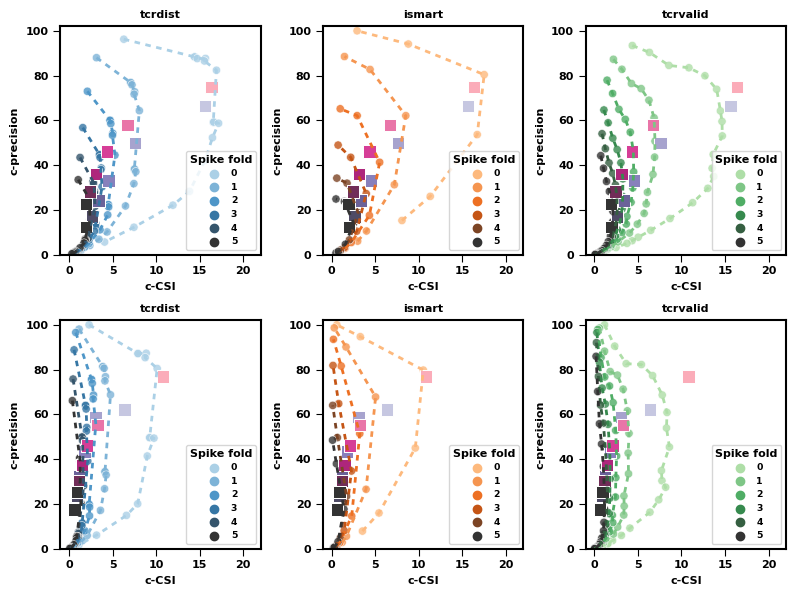

In [5]:
for reference in ['tcrvalid','gliph']:
    for include_double_assign in [True,False]:
        f,axes = plt.subplots(2,3,figsize=(8,6))
        size=20
        plot_df=master_score
        methods_ = ['tcrdist','ismart','tcrvalid']
        colors_=['Blues_d','Oranges_d','Greens_d']
        minsizes_ = [2,3]

        # reference='tcrvalid'
        if reference=='gliph':
            xlims  = [-1,22]

        elif reference=='tcrvalid':
            xlims = [-1,32]

        else:
            xlims = [-1,32]

        for i, sax in enumerate(axes):
            for j, ax in enumerate(sax):
                g = sns.scatterplot(
                    data=plot_df[
                        (plot_df['minsize']==minsizes_[i]) &
                        (plot_df['method']==methods_[j]) &
                        (plot_df['label_reference']==reference)
                    ],
                    x='c-CSI',
                    y='c-precision',
                    hue='spike_x',
                    palette=colors_[j],
                    alpha=0.8,
                    ax = ax,legend='brief'
                )
                if include_double_assign:
                    g2 = sns.scatterplot(
                        data=plot_df[
                            (plot_df['method']=='GLIPH') &
                            (plot_df['minsize']==minsizes_[i]) &
                            (plot_df['Doublecount']==True) &
                            (plot_df['label_reference']==reference)
                        ],
                        x='c-CSI',
                        y='c-precision',
                        hue='spike_x',
                        palette='Purples_d',
                        alpha=1,
                        s=80,
                        marker='X',
                        ax = ax,legend=None
                    )
                g3 = sns.scatterplot(
                    data=plot_df[
                        (plot_df['method']=='GLIPH') &
                        (plot_df['minsize']==minsizes_[i]) &
                        (plot_df['Doublecount']==False) &
                        (plot_df['label_reference']==reference)
                    ],
                   x='c-CSI',
                    y='c-precision',
                    hue='spike_x',
                    palette='Purples_d',
                    alpha=1,
                    s=80,
                    marker='s',
                    ax = ax,legend=None
                )
                g4 = sns.scatterplot(
                    data=plot_df[
                        (plot_df['method']=='clustcr') &
                        (plot_df['minsize']==minsizes_[i]) &
                        (plot_df['label_reference']==reference)
                    ],
                    x='c-CSI',
                    y='c-precision',
                    hue='spike_x',
                    palette='RdPu_d',
                    alpha=1,
                    s=80,
                    marker='s',
                    ax = ax,legend=None
                )
                axes2=sns.lineplot(x = 'c-CSI', y = 'c-precision', data = plot_df[
                        (plot_df['minsize']==minsizes_[i]) &
                        (plot_df['method']==methods_[j]) &
                        (plot_df['label_reference']==reference)
                    ], hue='spike_x',sort=False,style=True,dashes=[(2, 2)],palette=colors_[j],ax=ax,legend=None)

                #ax.legend().remove()
                ax.set_xlim([-1,35])
                ax.set_ylim([0,102])
                ax.set_xlim(xlims)
                ax.set_title(methods_[j])
                ax.legend(loc="lower right",title='Spike fold')



        plt.tight_layout()
        f.savefig('../results_data/spike/reference_{}_Spikein_comparitor_per_method_doubleassign_{}.pdf'.format(reference, include_double_assign),bbox_inches='tight')  


In [6]:
def prep_gliph_plotdf(reference,spike_x_range=[0],minsize=3):
    plot_df_4GLIPH_HQ=master_score[                   
                            (master_score['minsize']==minsize) &
                            (master_score['method']!='GLIPH') &
                            (master_score.spike_x.isin(spike_x_range)) &
                            (master_score['chain']=='TRB') &
                            (master_score['label_reference']==reference)
        ]
    plot_df_4GLIPH_HQ_gliph_double_assign=master_score[
                        (master_score['Doublecount']==True) &
                        (master_score['minsize']==minsize) &
                        (master_score.spike_x.isin(spike_x_range)) &
                        (master_score['label_reference']==reference)&
                        (master_score['method']=='GLIPH')]
    plot_df_4GLIPH_HQ_gliph_double_assign_fixed=master_score[
                        (master_score['Doublecount']==False) &
                        (master_score.spike_x.isin(spike_x_range)) &
                        (master_score['minsize']==minsize) &
                        (master_score['label_reference']==reference)&
                        (master_score['method']=='GLIPH')]
    return([plot_df_4GLIPH_HQ,plot_df_4GLIPH_HQ_gliph_double_assign,plot_df_4GLIPH_HQ_gliph_double_assign_fixed])

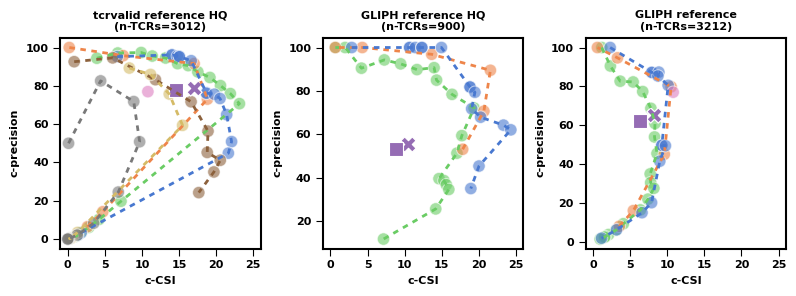

In [7]:
f,axes = plt.subplots(1,3,figsize=(8,3))
references=['tcrvalid','gliph_HQ','gliph']
references_names=['tcrvalid reference HQ\n(n-TCRs=3012)','GLIPH reference HQ\n(n-TCRs=900)','GLIPH reference\n(n-TCRs=3212)']
clus_min=3

for j, ax in enumerate(axes):
        plotting_df=prep_gliph_plotdf(references[j],minsize=clus_min)
        
        axes=sns.scatterplot(x='c-CSI', y='c-precision', hue='method', s=80,alpha=.6, 
                         palette=method_colors,data=plotting_df[0],legend='brief',ax=ax)
        axes2=sns.scatterplot(x='c-CSI', y='c-precision', hue='method', alpha=1,
                              s=120, palette=method_colors, marker='X',data=plotting_df[1],
                            legend=None,ax=ax)
        axes3=sns.scatterplot(x='c-CSI', y='c-precision', hue='method', alpha=1, 
                              palette=method_colors, marker='s',s=100,data=plotting_df[2],legend=None,ax=ax)
        axes4=sns.lineplot(x = 'c-CSI', y = 'c-precision', data = plotting_df[0],
                           hue='method',sort=False,style=True,dashes=[(2, 2)],palette=method_colors,legend=None,ax=ax)
        #axes4.legend().remove()
        #axes4.set(xlabel=None)
        ax.set_title(references_names[j])
        ax.set_xlim([-1,26])
        # ax.legend(loc="lower right",title='method')
        ax.legend().remove()

plt.tight_layout()
savename=str(clus_min)
f.savefig('../results_data/spike/Spike0_reference_comparitor_minsize'+savename+'.pdf',bbox_inches='tight') 

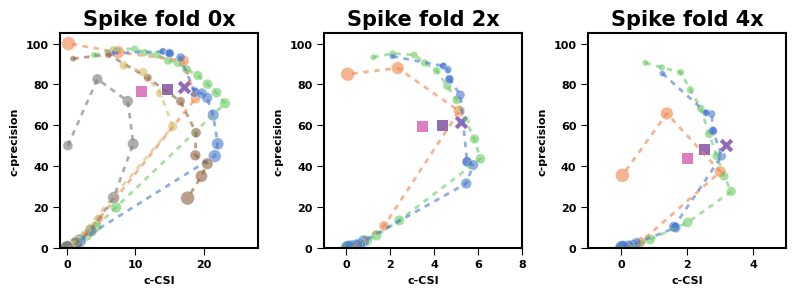

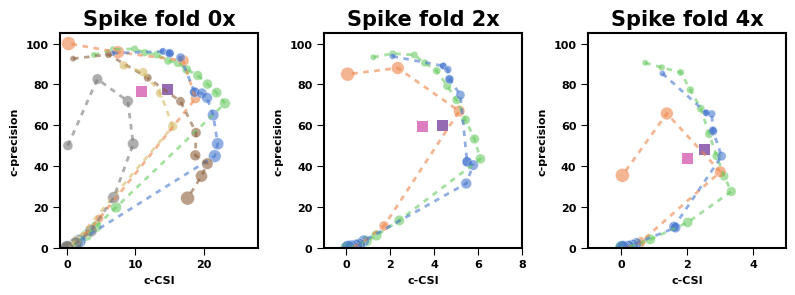

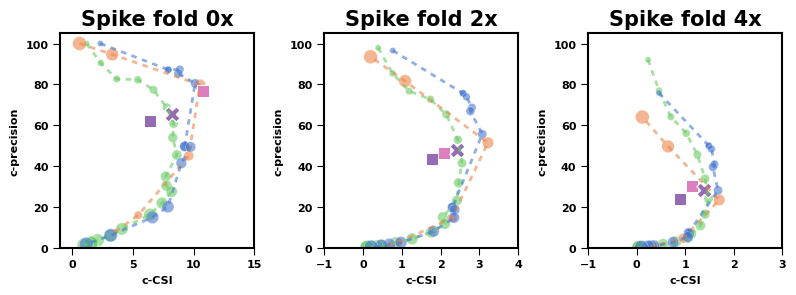

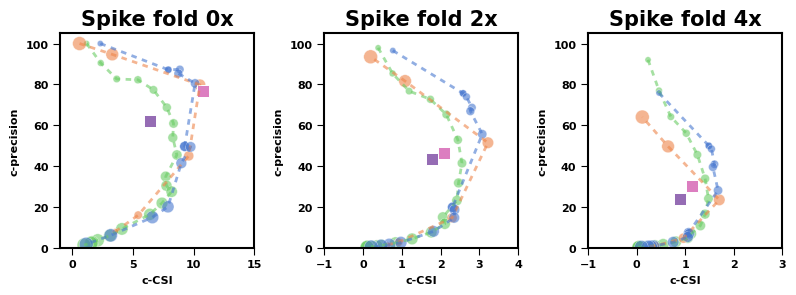

In [9]:
for reference in ['tcrvalid','gliph']:
    for include_double_assign in [True,False]:
        f,axes = plt.subplots(1,3,figsize=(8,3))
        spike_ranges=[0,2,4]
        # reference='gliph'
        minsizes_ = 3
        # Include_double_assign=True
        plot_df=prep_gliph_plotdf(reference,spike_x_range=spike_ranges)

        if reference=='gliph':
            if minsizes_==2:
                xlims = [[-1,25],[-1,15],[-1,10],[-1,8],[-1,7],[-1,7]]
                xlims = [xlims[i] for i in spike_ranges]
            elif minsizes_==3:
                xlims=[[-1,15],[-1,8],[-1,4],[-1,4],[-1,3],[-1,3]]
                xlims = [xlims[i] for i in spike_ranges]

        elif reference=='tcrvalid':
            if minsizes_==2:
                xlims = [[-1,35],[-1,15],[-1,15],[-1,8],[-1,8],[-1,8]]
                xlims = [xlims[i] for i in spike_ranges]
            elif minsizes_==3:
                xlims=[[-1,28],[-1,15],[-1,8],[-1,5],[-1,5],[-1,5]]
                xlims = [xlims[i] for i in spike_ranges]


        for j, ax in enumerate(axes):        
                g = sns.scatterplot(
                    data=plot_df[0][
                        (plot_df[0]['minsize']==minsizes_) &
                        (plot_df[0]['spike_x']==spike_ranges[j]) &
                        (plot_df[0]['label_reference']==reference)&
                        (plot_df[0]['chain']=='TRB')
                    ],
                    x='c-CSI',
                    y='c-precision',
                    hue='method',
                    size='epsilon_scaled',
                    sizes=(20, 100),
                    palette=method_colors,
                    alpha=0.6,
                    ax = ax,legend=None
                )
                g3 = sns.scatterplot(
                    data=plot_df[0][
                        (plot_df[0]['method']=='clustcr') &
                        (plot_df[0]['minsize']==minsizes_) &
                        (plot_df[0]['spike_x']==spike_ranges[j])&
                        (plot_df[0]['label_reference']==reference)
                    ],
                    x='c-CSI',
                    y='c-precision',
                    hue='method',
                    palette=method_colors,
                    alpha=1,
                    s=80,
                    marker='s',
                    ax = ax,legend=None
                )

                g3 = sns.scatterplot(
                    data=plot_df[2][(plot_df[2].spike_x==spike_ranges[j])],
                    x='c-CSI',
                    y='c-precision',
                    hue='method',
                    palette=method_colors,
                    alpha=1,
                    s=80,
                    marker='s',
                    ax = ax,legend=None
                )
                if include_double_assign==True:

                    g3 = sns.scatterplot(
                        data=plot_df[1][(plot_df[1].spike_x==spike_ranges[j])],
                        x='c-CSI',
                        y='c-precision',
                        hue='method',
                        palette=method_colors,
                        alpha=1,
                        s=120,
                        marker='X',
                        ax = ax,legend=None
                    )
                axes2=sns.lineplot(x = 'c-CSI', y = 'c-precision',  data=plot_df[0][
                        (plot_df[0]['minsize']==minsizes_) &
                        (plot_df[0]['spike_x']==spike_ranges[j]) &
                        (plot_df[0]['chain']=='TRB')&
                        (plot_df[0]['label_reference']==reference)
                    ],
                    hue='method',sort=False,style=True,dashes=[(2, 2)],palette=method_colors,alpha=0.6,ax=ax,legend=None)

                #ax.legend().remove()
                ax.set_xlim(xlims[j])
                ax.set_ylim([0,105])
                ax.set_title('Spike fold '+str(spike_ranges[j])+'x',fontsize=15)
                # if j>0:
                #     ax.set_ylabel('')


        plt.tight_layout()
        f.savefig('../results_data/spike/spike_024_reference_{}_doubleassign_{}.pdf'.format(reference, include_double_assign),bbox_inches='tight')  

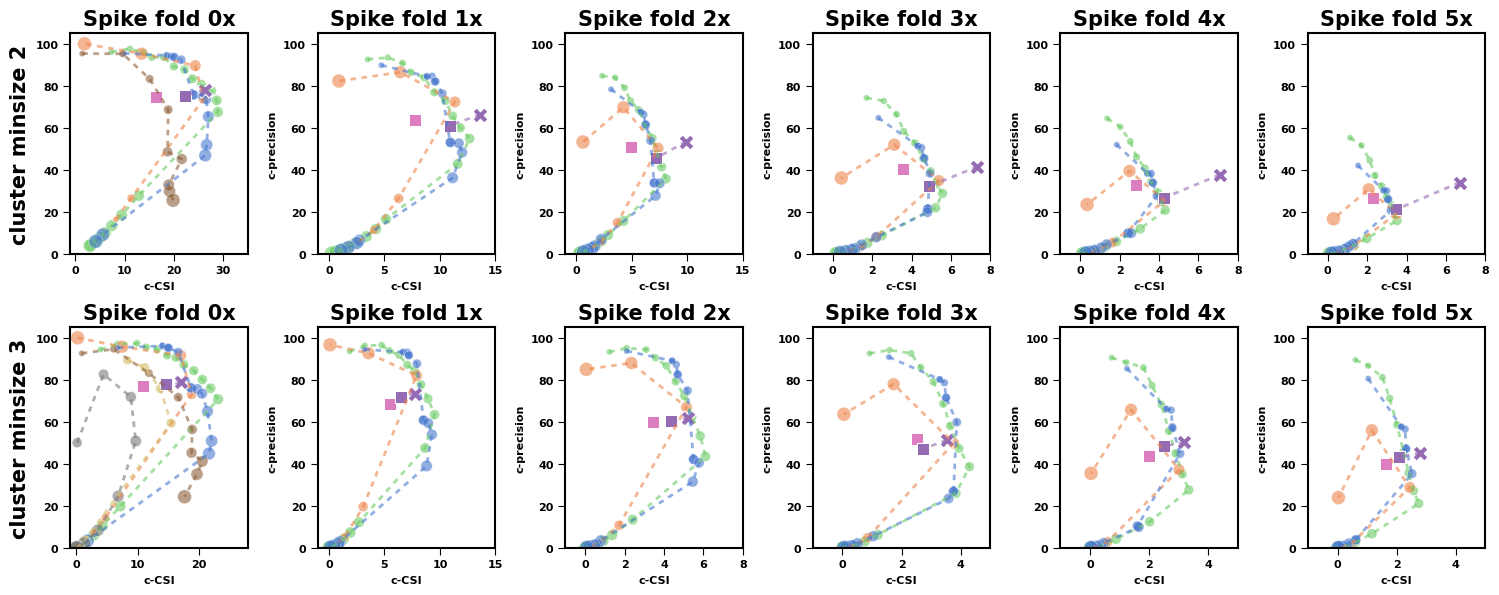

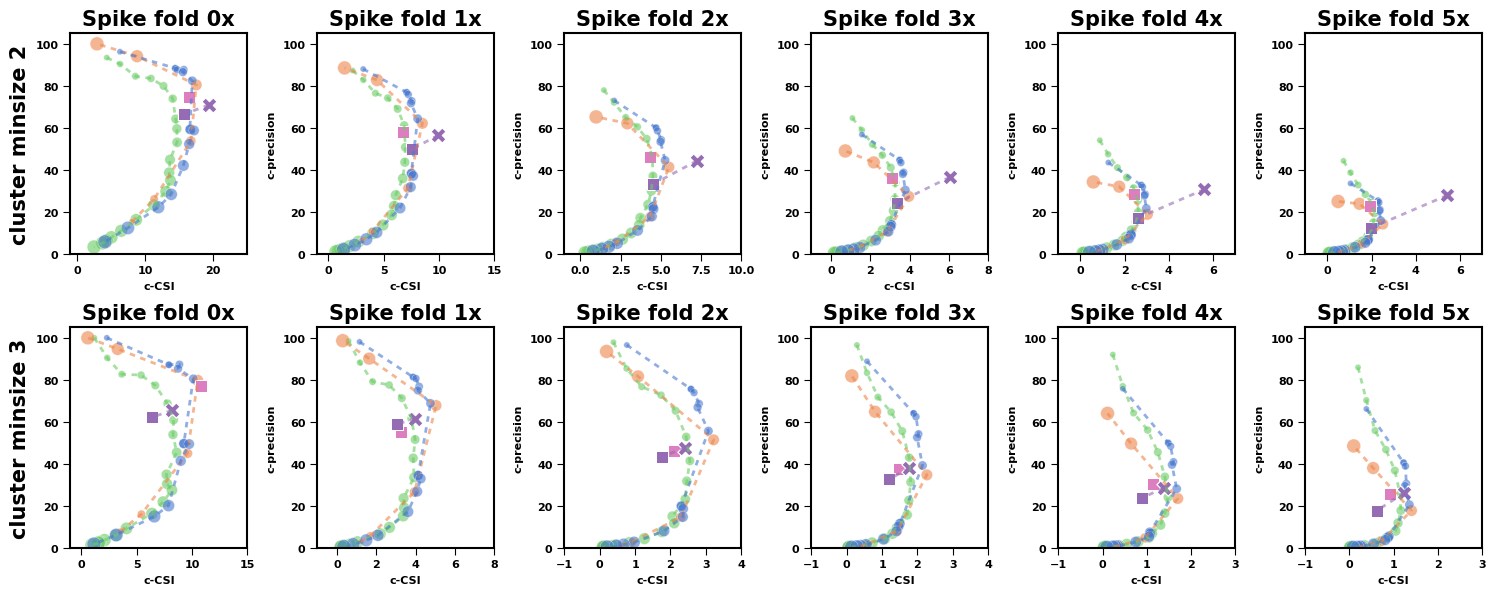

In [10]:
for reference in ['tcrvalid','gliph']:
    f,axes = plt.subplots(2,6,figsize=(15,6))
    size=20
    plot_df=master_score
    minsizes_ = [2,3]
    # reference='tcrvalid'
    if reference=='gliph':
        xlims = [[[-1,25],[-1,15],[-1,10],[-1,8],[-1,7],[-1,7]],[[-1,15],[-1,8],[-1,4],[-1,4],[-1,3],[-1,3]]]
    elif reference=='tcrvalid':
        xlims = [[[-1,35],[-1,15],[-1,15],[-1,8],[-1,8],[-1,8]],[[-1,28],[-1,15],[-1,8],[-1,5],[-1,5],[-1,5]]]

    for i, sax in enumerate(axes):
        for j, ax in enumerate(sax):

            g = sns.scatterplot(
                data=plot_df[
                    (plot_df['minsize']==minsizes_[i]) &
                    (plot_df['spike_x']==j) &
                    (plot_df['label_reference']==reference)&
                    (plot_df['chain']=='TRB')
                ],
                x='c-CSI',
                y='c-precision',
                hue='method',
                size='epsilon_scaled',
                sizes=(20, 100),
                palette=method_colors,
                alpha=0.6,
                ax = ax,legend=None
            )

            g3 = sns.scatterplot(
                data=plot_df[
                    (plot_df['method']=='clustcr') &
                    (plot_df['minsize']==minsizes_[i]) &
                    (plot_df['spike_x']==j)&
                    (plot_df['label_reference']==reference)
                ],
                x='c-CSI',
                y='c-precision',
                hue='method',
                palette=method_colors,
                alpha=1,
                s=80,
                marker='s',
                ax = ax,legend=None
            )
            g3 = sns.scatterplot(
                data=plot_df[
                    (plot_df['method']=='GLIPH') &
                    (plot_df['minsize']==minsizes_[i]) &
                    (plot_df['Doublecount']==False)&
                    (plot_df['spike_x']==j)&
                    (plot_df['label_reference']==reference)
                ],
                x='c-CSI',
                y='c-precision',
                hue='method',
                palette=method_colors,
                alpha=1,
                s=80,
                marker='s',
                ax = ax,legend=None
            )
            g3 = sns.scatterplot(
                data=plot_df[
                    (plot_df['method']=='GLIPH') &
                    (plot_df['minsize']==minsizes_[i]) &
                    (plot_df['Doublecount']==True)&
                    (plot_df['spike_x']==j)&
                    (plot_df['label_reference']==reference)
                ],
                x='c-CSI',
                y='c-precision',
                hue='method',
                palette=method_colors,
                alpha=1,
                s=120,
                marker='X',
                ax = ax,legend=None
            )
            axes2=sns.lineplot(x = 'c-CSI', y = 'c-precision',  data=plot_df[
                    (plot_df['minsize']==minsizes_[i]) &
                    (plot_df['spike_x']==j) &
                    (plot_df['chain']=='TRB')&
                    (plot_df['label_reference']==reference)
                ],
                hue='method',sort=False,style=True,dashes=[(2, 2)],palette=method_colors,alpha=0.6,ax=ax,legend=None)

            #ax.legend().remove()
            ax.set_xlim(xlims[i][j])
            ax.set_ylim([0,105])
            ax.set_title('Spike fold '+str(j)+'x',fontsize=15)
            if j==0:
                ax.set_ylabel('cluster minsize '+str(minsizes_[i]),fontsize=15)


    plt.tight_layout()
    f.savefig('../results_data/spike/fullspike_reference_{}.pdf'.format(reference),bbox_inches='tight')  

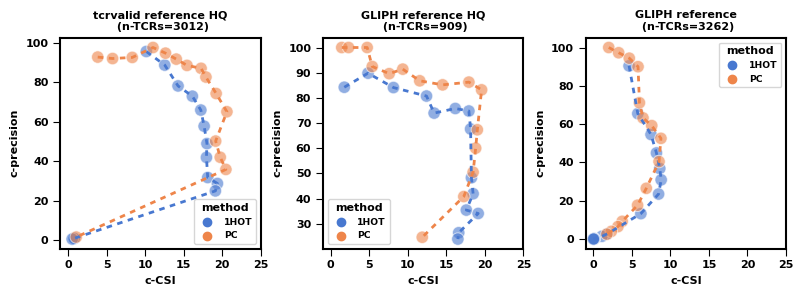

In [27]:
f,axes = plt.subplots(1,3,figsize=(8,3))
references=['tcrvalid','gliph_HQ','gliph']
references_names=['tcrvalid reference HQ\n (n-TCRs=3012)','GLIPH reference HQ\n (n-TCRs=909)','GLIPH reference\n (n-TCRs=3262)']
minsize=2
xlim=[-1,25]
sub_df=master_score[(master_score['method']=='PC') | (master_score['method']=='1HOT')]
for j, ax in enumerate(axes):
        plotting_df=sub_df[(sub_df['label_reference']==references[j])]
        #plotting_df=concatenated_seq_encoding[(concatenated_seq_encoding['reference']==references[j])]
        axes=sns.scatterplot(x='c-CSI', y='c-precision', hue='method', s=80,alpha=.6, 
                         palette=method_colors,data=plotting_df,ax=ax)
        axes2=sns.lineplot(x = 'c-CSI', y = 'c-precision', data = plotting_df,
                           hue='method',sort=False,style=True,dashes=[(2, 2)],palette=method_colors,legend=None,ax=ax)
        #axes4.legend().remove()
        #axes4.set(xlabel=None)
        ax.set_title(references_names[j])
        ax.set_xlim(xlim)
        ax.legend(loc="best",title='method')
plt.tight_layout()
        
save_name='../results_data/spike/1HotvsPC'
f.savefig(save_name+'.pdf',bbox_inches='tight')  
        

In [32]:
master_score[(master_score['method']=='ismart')&(master_score['label_reference']=='gliph')&(master_score['spike_x']==0.0)]

,Unnamed: 0,Unnamed: 0.1,spike_x,minsize,eps,label_reference,method,epsilon_scaled,chain,c-CSI,...,n_clusters,n_epitopes_captured,percent_clustered,percent_clustered_in_largest,percent_labeled_clustered,mean_purity,chains,flu_included,sources,mean_features
54,54,54,0.0,2.0,5.5,gliph,ismart,0.0,TRB,8.062538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,60,60,0.0,2.0,6.0,gliph,ismart,0.2,TRB,11.312078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,66,66,0.0,2.0,6.5,gliph,ismart,0.4,TRB,16.707541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,69,69,0.0,2.0,7.0,gliph,ismart,0.6,TRB,17.504598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,72,72,0.0,2.0,7.5,gliph,ismart,0.8,TRB,8.798283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,75,75,0.0,2.0,8.0,gliph,ismart,1.0,TRB,2.912324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,178,180,0.0,3.0,5.5,gliph,ismart,0.0,TRB,3.525445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,184,186,0.0,3.0,6.0,gliph,ismart,0.2,TRB,5.426119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,190,192,0.0,3.0,6.5,gliph,ismart,0.4,TRB,9.595340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,193,195,0.0,3.0,7.0,gliph,ismart,0.6,TRB,10.515021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
